# Prosper Loan Data Exploration
by Kudakwashe Verah

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and get an overview of the data
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Dataset structure
There are 113,937 loans in the dataset with 81 features including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others. Most variables are numeric and categorical in nature.

### Main feature(s) of interest in the dataset?
I am mostly interested in the features that influence the outcome of a loan.

### What features in the dataset could help support the investigation into the feature(s) of interest?
I expect that the following features will have the largest impact on the outcome of a loan:

1. __LoanStatus__ - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
2. __Term__ - The length of the loan when the listing was created.
3. __CreditGrade__ - The borrower's assigned credit rating at the time the listing was created. This is applicable for listings pre-2009 and will only be populated for those listings.
4. __BorrowerRate__ - The borrower's interest rate for this loan. 
5. __DebtToIncomeRatio__ - The borrower's debt to income ratio at the time the credit profile was pulled. This value is null if the debt to income ratio is not available and is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
6. __IncomeRange__ - The borrower's income ragnde at the time the listing was created.
7. __LoanOriginalAmount__ - The origination amount of the loan.
8. __MonthlyLoanPayment__ - The scheduled monthly loan payment.

## Univariate Exploration

### Loan Status
Let's start by looking at the proportions of the loan statuses.

In [7]:
df.LoanStatus.describe()

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [8]:
"""
Plot a horizontal bar chart of the proportions of each loan status.
"""

# create a function to plot proportional plot
def prop_plot_status(df):
    #determine the proportions of each loan type
    data = df
    y = data['LoanStatus']
    
    n_loans = data.shape[0]
    loan_status_count = y.value_counts()
    loan_status_order = loan_status_count.index
    max_loan_status_count = loan_status_count[0]
    max_prop_status = max_loan_status_count / n_loans

    #set the data to plot
    base_colour = sb.color_palette()[0]
    plt.figure(figsize = [12, 7])
    sb.countplot(data = data, y = y, color = base_colour, order = loan_status_order)

    for i in range(loan_status_count.shape[0]):
        count = loan_status_count[i]
        pct_string = '{:0.4f}%'.format(100 * count / n_loans)
        plt.text(count + 1, i, pct_string, va = 'center');

    plt.xlabel('Count')
    plt.ylabel('Loan Status')
    plt.title('Distribution of Loan Statuses', size = 16)
    
    return prop_plot_status

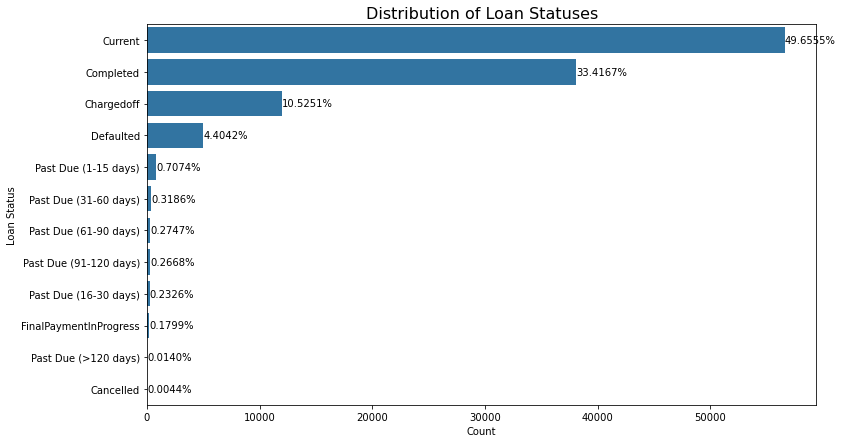

In [9]:
prop_plot_status(df);

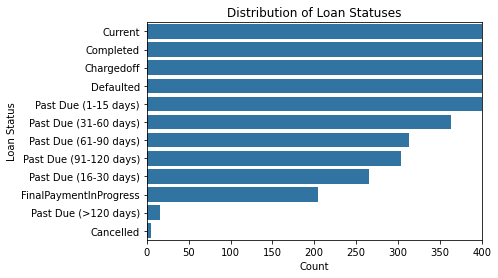

In [10]:
"""
Plot a horizontal bar chart of the loan types
with counts less than 500 in the dataset.
"""
#determine the proportions of each loan type
n_loans = df.shape[0]
loan_status_count = df['LoanStatus'].value_counts()
loan_status_order = loan_status_count.index
max_loan_count = loan_status_count[0]
max_prop = max_loan_count / n_loans

#set the data to plot
base_colour = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = base_colour, 
            order = loan_status_order)

plt.xlim(0, 400)
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Statuses')

plt.show()

The 'Current' loan type makes up 49.7% of the total loans in the dataset. The 'Completed, 'Chardgedoff', 'Default' and 'Current' loan types all make up approximately 98% of the total loans in our dataset. The 'Completed' loan type has a proportion of 33.4%.

### Loan Term

In [11]:
# plot the distribution
def loan_term_plot(df):
    plt.figure(figsize = [8, 5])

    sb.countplot(data = df, x = 'Term', palette = 'Blues_r')
    
    plt.xlabel('Loan Term (months)')
    plt.ylabel('Count')
    plt.title('Distribution of Loan Terms')
    
    return loan_term_plot

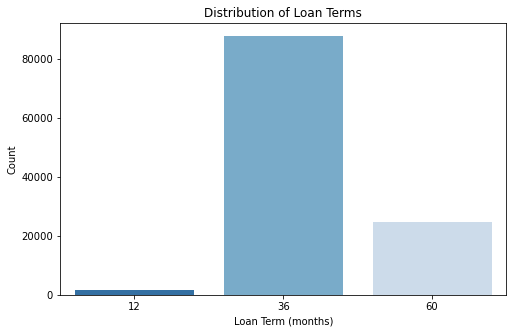

In [12]:
loan_term_plot(df);

From the above plot, we can see that the most frequent loan term is 36 months.

### Interest Rate
Let's plot a histogram of the interest rate.

In [13]:
df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [14]:
df.BorrowerRate.dropna(axis = 0, inplace = True)

In [15]:
"""
Plot the borrower's interest rate on a histogram.
"""
# plot the histogram
def hist_plot_interest(df):
    plt.figure(figsize=[8, 5])
    sb.distplot(df['BorrowerRate'], kde = False, bins = 200)

    plt.xlabel('Interest Rate')
    plt.ylabel('Count')
    plt.show()
    
    return hist_plot_interest

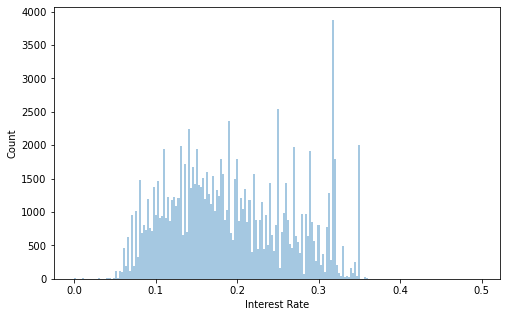

In [16]:
hist_plot_interest(df);

It appears most of our loans have an interest rate between 5% and 35%. Let's zoom in on this distribution.

In [17]:
"""
Zoom in on the interest rate histogram.
"""

def hist_plot_interest(df):
    # plot the histogram
    plt.figure(figsize=[8, 5])
    sb.distplot(df['BorrowerRate'], kde = False, bins = 200)
    plt.xlim([0.05, 0.36])

    plt.xlabel('Interest Rate')
    plt.ylabel('Count')
    plt.title('Distribution of Interest Rate')
    plt.show()
    
    return hist_plot_interest

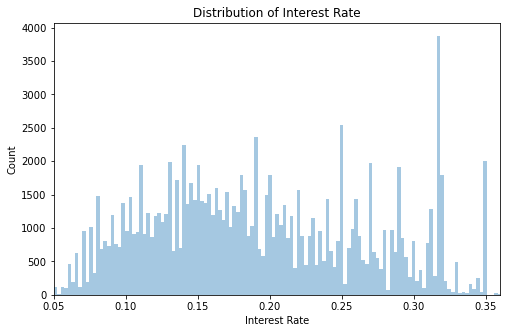

In [18]:
hist_plot_interest(df);

We have the highest peaks at around 14%, 19%, 25%, 32% and 35% - with the maximum peak being the one at 32%. Between the peak at 14% and 19%, there's a gentle decrease and then a steep jump just before we reach the 19% peak. The same pattern follows between the next two peak points till we reach the last peak at 35%.

### Credit Grade
Now that we have high level overview of the interest rate and loan statuses, let's see the distribution of the borrower's credit grade.

In [19]:
df['CreditGrade'].describe()

count     28953
unique        8
top           C
freq       5649
Name: CreditGrade, dtype: object

In [20]:
df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [21]:
# drop null rows without an estimated return
df.CreditGrade.dropna(axis = 0, inplace = True)

In [22]:
# convert ratings to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'NC']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['CreditGrade'] = df['CreditGrade'].astype(ordered_var)

In [23]:
# plot the distribution
def ordinal_plot_credit(df):
    plt.figure(figsize = [8, 5])

    sb.countplot(data = df, x = 'CreditGrade', palette = 'Blues')
    
    plt.xlabel('Credit Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Borrower Credit Ratings')
    
    return ordinal_plot_credit

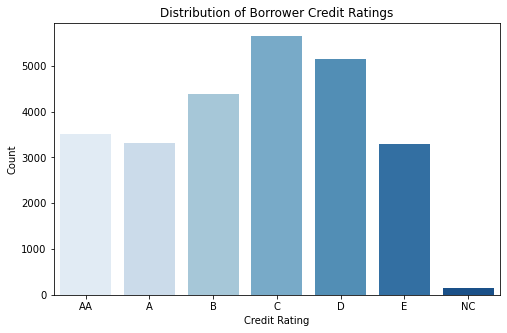

In [24]:
ordinal_plot_credit(df);

The distribution of credit ratins is skewed to the right with the highest frequency falling under the 'C' rating.

### Income Range
Let's look at the underlying features that determine a borrower's credit rating. We'll start by taking a look at the Income Ranges.

In [25]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

We will combine the 'Not displayed', '$0' and 'Not employed' categories to simplify our visualisation.

In [26]:
df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [27]:
# convert ratings to ordinal category type
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)

In [28]:
"""
Plot horizontal bar chart of Income Ranges.
"""

def horiz_bar_income(df):
    plt.figure(figsize = [8, 5])
    
    sb.countplot(data = df, y = 'IncomeRange', palette = 'Blues_r')
    plt.xlabel('Count')
    plt.ylabel('Income Range')
    plt.title('Distribution of Borrower Incomes')
    
    return horiz_bar_income

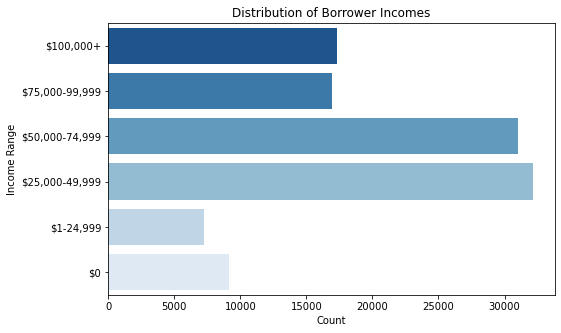

In [29]:
horiz_bar_income(df);

The number of borrowers for the \\$25k-49k range is almost the same as the \\$50k-74k range and the amount of borrowers in the \\$75k-100k range is nearly the same as all borrowers that have an income of over \\$100k.

### Debt to Income Ratio
This is always a good indicator to the creditor to ensure that the borrower isn't overleveraged in the event that they have a loss if income and are unable to repay all of their debts.

In [30]:
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [31]:
df.DebtToIncomeRatio.dropna(axis = 0, inplace = True)

In [32]:
"""
Plot a distribution plot of the debt to income ratios.
"""
def dist_plot_dti(df):
    plt.figure(figsize = [8, 5])

    sb.distplot(df.DebtToIncomeRatio, kde = False, bins = 200);

    plt.xlim(-0.01, 1.25)
    plt.ylabel('Count')
    plt.xlabel('Debt to Income Ratio')
    plt.title('Distribution of Borrower Debt to Income Ratio')
    
    return dist_plot_dti

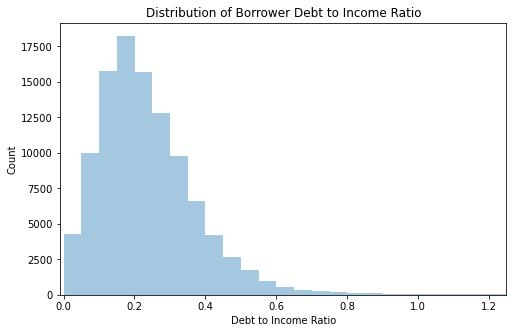

In [33]:
dist_plot_dti(df);

From the distribution above, it appears that most borrowers who apply for a loan have a debt to income ratio around 20%.

We will now look at the last two features of interest, starting with the Loan Original Amount and Monthly Repayment Amount.
### Original Loan & Monthly Repayment Amounts

In [34]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [35]:
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [36]:
"""
Plot a distribution plot of the original loan amount.
"""
def dist_plot_og_loan_repay(df):
    plt.figure(figsize = [20, 5])

    # LHS plot - Original Loan Amount
    plt.subplot(1, 2, 1)
    sb.distplot(df.LoanOriginalAmount, kde = False, color = sb.color_palette()[0]);

    plt.xlim(500, 36000)
    plt.ylabel('Count')
    plt.xlabel('Original Loan Amount ($)')
    plt.title('Distribution of Original Loan Amounts')
    
    # RHS plot - Monthly Repayment
    plt.subplot(1, 2, 2)
    sb.distplot(df.MonthlyLoanPayment, kde = False, color = sb.color_palette()[1]);

    plt.xlim(-50, 2300)
    plt.ylabel('Count')
    plt.xlabel('Monthly Repayment ($)')
    plt.title('Distribution of Monthly Repayments')
    
    return dist_plot_og_loan_repay

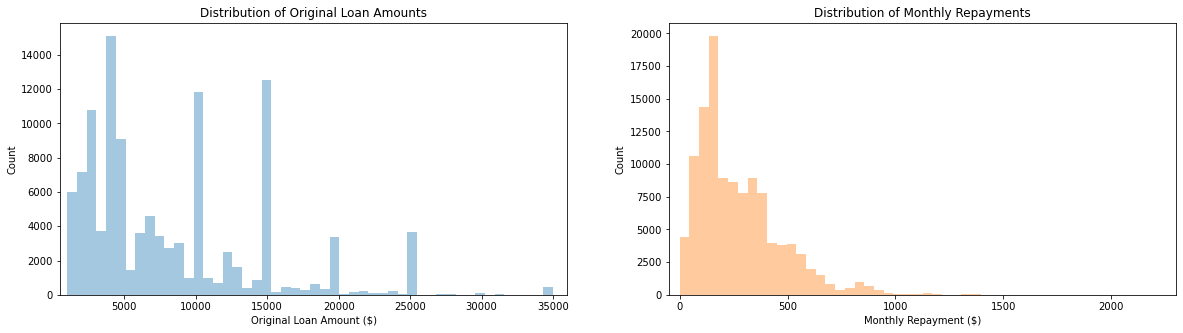

In [37]:
dist_plot_og_loan_repay(df);

For the Original loan amounts, we have peaks at the standard loan amounts you'd expect to see, that is, around \\$5,000, \\$10,000, \\$15,000, \\$20,000 and \\$25,000. The most common original loan amount is \\$4,000. <br>

The most common loan repayment is \\$150. Most loan repayments fall in the \\$0-$500 range and it's interesting to see that there are loan repayments of \\$0. These could be from either the completed or defaulted loans, let's investigate.

In [38]:
"""
Let's make multiple plots of the loan repayment amounts per loan status.
"""
# define a function for multiple plots
def multi_plot_repay_status(df):
    # multiplot for loan status
    variables = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Cancelled', 'Past Due (1-15 days)',  'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'FinalPaymentInProgress']

    plt.figure(figsize = [25, 25])

    # loop through variables list
    for i in range(len(variables)):
        plt.subplot(4, 3, i + 1)

        sb.distplot(df.query('LoanStatus == "{}"'.format(variables[i])).MonthlyLoanPayment, 
                     kde = False, bins = 200);

        plt.xlabel('Monthly Repayment ($)')
        plt.ylabel('Count')
        plt.title(variables[i])

    plt.suptitle('Distribution of Monthly Repayments by Loan Status', size = 30)
    
    return multi_plot_repay_status

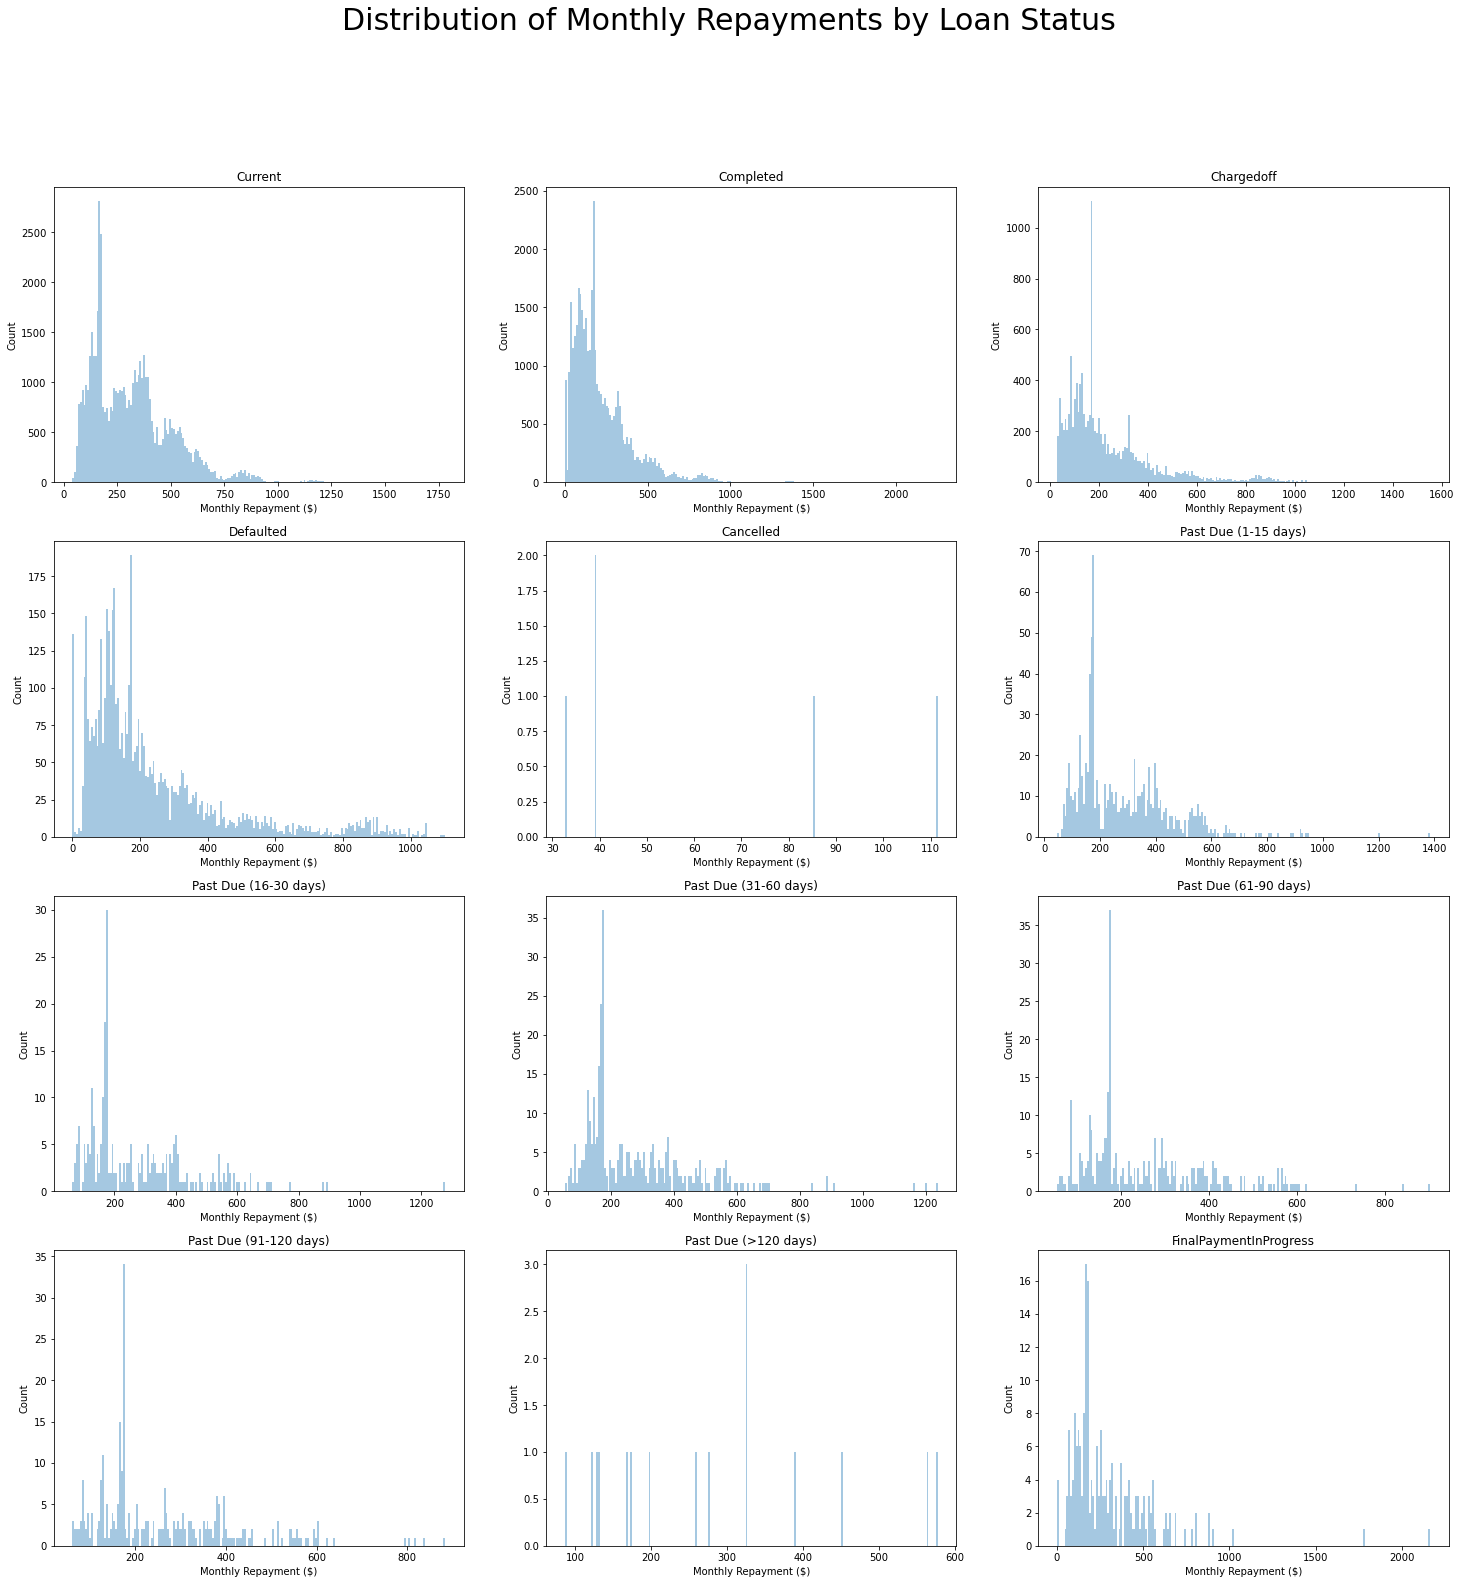

In [39]:
multi_plot_repay_status(df);

We were right, both the Completed and Defaulted loan statuses have repayment amounts of \\$0, the Final Payment In Progress also has a repayment amount of \\$0.<br>
All the past due statuses except for past due (>120 days) have around \\$190 as the most common repayment amount. Past due (>120 days) has 3 people with around \\$310 as their repayment amount.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
To summarise our variables of interest, we looked at loan status, credit rating, loan term, interest rate, debt to income ratio, income range, original loan amount and the monthly repayment amount.<br>

We saw an exponential distribution for loan status with the 'Current' loans being about 49.66% of the total loans. The most common loan term is 36 months based on the distribution we observed. We saw relatively normal distributions for income range, debt to income ratio, credit ratings and interest rate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We saw that the monthly loan repayments vary greatly between different loan status, although there are similarities in those that are past due by less than 120 days.<br>

To tidy up our visualisations, we combined several rows for different visuals where the categories appeared to be redundant. Such as the income ranges of 'Not employed' and 'Not displayed' are essentially equivalent to '\\$0.'

## Bivariate Exploration

### Quantitative vs. Quantitative
We'll start by looking at the pairwise correlation between the numeric features we are interested in.

In [40]:
"""
Group numeric and categorical variables into their own 'bins'.
"""

numeric_vars = ['BorrowerRate', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categorical_vars = ['IncomeRange', 'LoanStatus', 'CreditGrade', 'Term']

In [41]:
"""
Plot a matrix with 1% of the data points.
"""

def random_matrix_plot(df):
    # randomly select 1% of data points
    perc_samples_1 = np.random.choice(df.shape[0], int(df.shape[0]*0.01), replace = False)
    df_samples_1 = df.loc[perc_samples_1,:]

    # remove NANs from the sample data
    df_samples_1 = df_samples_1.dropna(subset = ['BorrowerRate', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment'])

    # plot pair grid with histograms on the diagonals and scatter plots on the off-diagonals
    g = sb.PairGrid(data = df_samples_1, vars = numeric_vars, size = 4, aspect = 1.25)
    g = g.map_diag(plt.hist, bins = 50)
    g.map_offdiag(plt.scatter, alpha = 1/8)
    
    # set axis limits
    g.axes[0,1].set_xlim(-0.1, 1)
    g.axes[1,0].set_ylim(-0.1, 1)
    g.axes[3,0].set_ylim(0, 1000)

    # set matrix plot title
    g.fig.suptitle('Matrix Plot of Interest Rates, Debt to Income Ratios, Original Loan Amounts and Monthly Repayments', 
                   size = 23);
    g.fig.subplots_adjust(top = .95);
    
    return random_matrix_plot

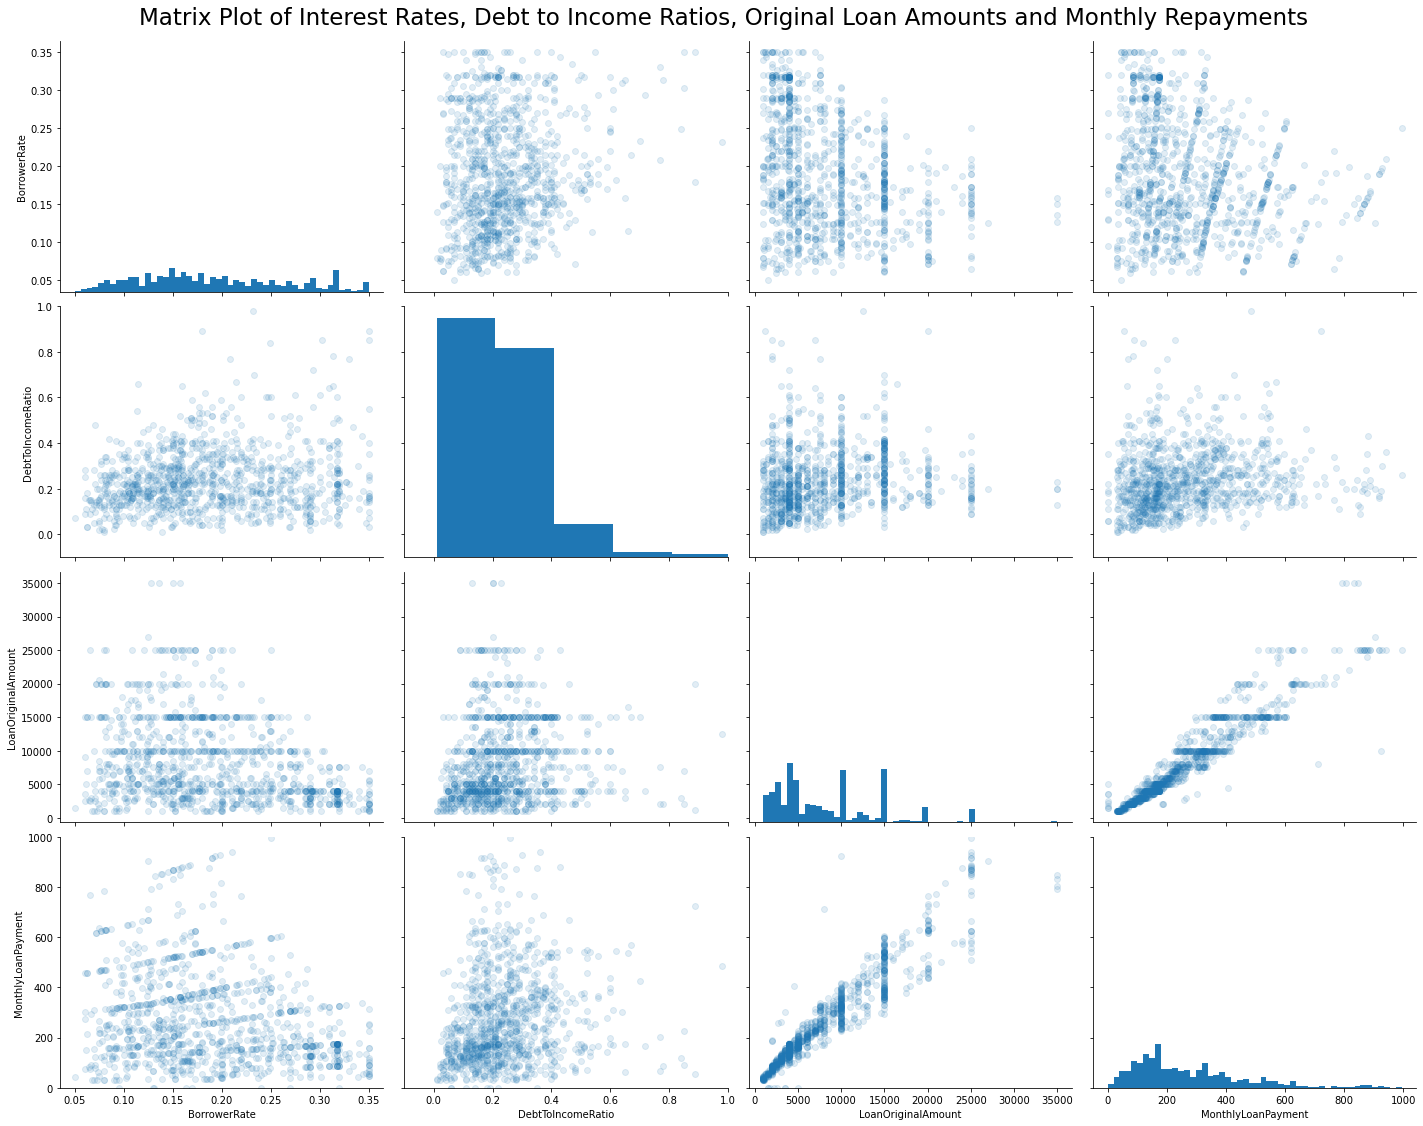

In [42]:
random_matrix_plot(df);

We have a good understanding of the range of values we can expect based on our univariate exploration. Limiting the axis values allows us to focus on the data without it being skewed by outliers.<br>

There appears to be some correlation between the original loan amount and the monthly loan repayments. Apart from this correlation, there appears to be no other correlation between the other numeric variables.

We'll further investigate this correlation between monthly loan repayments and the original loan amounts below.

#### MonthlyLoanPayment vs. LoanOriginalAmount

In [43]:
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [44]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [45]:
"""
Plot a scatter and heat map plot of all the data points for the 
Monthly Loan Repayments and Original Loan Amounts.
"""
def loan_repayment_vs_og_loan_amount(df):
    plt.figure(figsize = [18, 6])

    # plot on LHS
    plt.subplot(1, 2, 1)
    sb.regplot(data = df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', 
               scatter_kws = {'alpha':1/20}, fit_reg = False)
    plt.xlabel('Monthly Repayment ($)')
    plt.ylabel('Original Loan Amount ($)')

    # plot on RHS
    plt.subplot(1, 2, 2)
    plt.hist2d(data = df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', cmin = 0.5, 
               cmap ='viridis_r', bins = 30)
    plt.colorbar()
    plt.xlabel('Monthly Repayment ($)')
    plt.ylabel('Original Loan Amount ($)')
                
    plt.suptitle('Monthly Repayments (\\$) vs Original Loan Amounts (\\$)', size = 15)
                
    return loan_repayment_vs_og_loan_amount

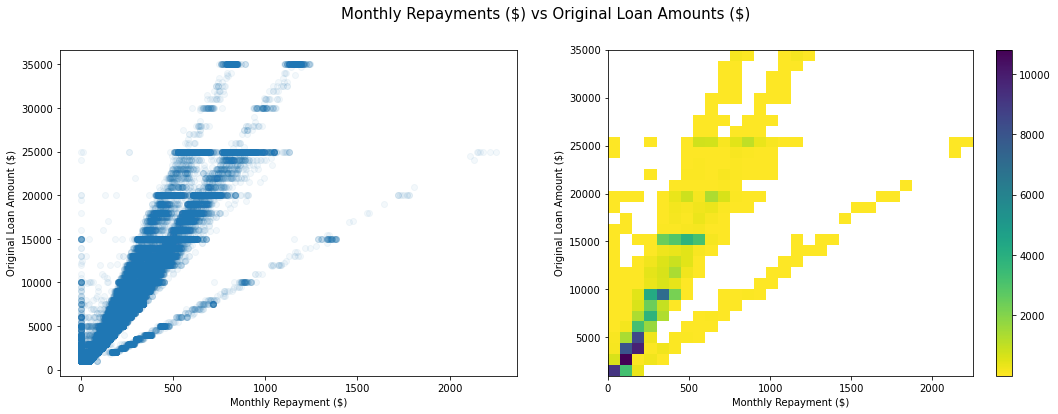

In [46]:
loan_repayment_vs_og_loan_amount(df);

As we had discovered previously, the Completed, Defaulted and Final Payment In Progress loan statuses have a repayment amount of \\$0. This would explain the high number of points at the origin point of our plots.<br>

The above plots seem to have 4 distinct correlations as 4 different lines, I believe this could be based on the different loan statuses. We'll investigate this further in our multivariate analysis.

### Quantitaive vs. Qualitative
Let's take a look at how the borrower's income range and credit rating relates to their original loan amount and their monthly repayments.

In [47]:
"""
Plot box plots of the Original Loan Amounts by Income Range and Credit Ratings.
"""
def box_plot_og_loan(df):
    # create plot figure
    plt.figure(figsize = [23, 5])
    
    # LHS botton plot
    plt.subplot(1, 2, 1)
    ax1 = sb.boxplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', palette = 'Blues_r', showfliers = False)
    plt.xlim(-100, 26000)
    plt.ylabel('Income Range')
    plt.xlabel('Original Loan Amount (\\$)')
    

    # RHS bottom plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data = df, y = 'CreditGrade', x = 'LoanOriginalAmount', palette = 'YlOrBr_r', showfliers = False)
    plt.xlim(-100, 26000)
    plt.ylabel('Credit Rating')
    plt.xlabel('Original Loan Amount (\\$)')
    
    # set y-axis limits to be same as left plot
    plt.ylim(ax1.get_ylim()) 
    
    plt.suptitle('Original Loan Amounts by Income Range and Credit Ratings', size = 20)
    
    return box_plot_og_loan

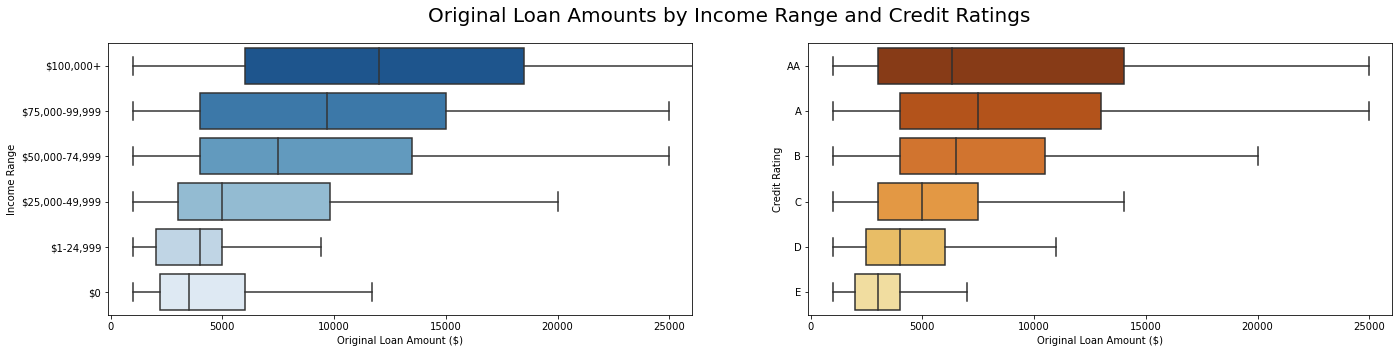

In [48]:
box_plot_og_loan(df);

From the above plots, we can see that as the borrower's income increased, the median original loan amounts also increased. Interestingly however, we see that as the borrower's credit rating increases, their median original loan amount increases until we reach the 'AA' credit rating, where it suddenly decreases to below the median for the 'B' credit rating.

We could speculate that this could be affected by the loan term, we can investigate this in our multivariate analysis.

Next, let's post the monthly loan repayments.

In [49]:
"""
Plot box plots of the Monthly Loan Repayments by Income Range and Credit Ratings.
"""
def box_plot_repay(df):
    # create plot figure
    plt.figure(figsize = [23, 5])
    
    # LHS botton plot
    plt.subplot(1, 2, 1)
    ax1 = sb.boxplot(data = df, y = 'IncomeRange', x = 'MonthlyLoanPayment', palette = 'Blues_r', showfliers = False)
    plt.ylabel('Income Range')
    plt.xlabel('Monthly Repayment (\\$)')
    

    # RHS bottom plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data = df, y = 'CreditGrade', x = 'MonthlyLoanPayment', palette = 'YlOrBr_r', showfliers = False)
    plt.ylabel('Credit Rating')
    plt.xlabel('Monthly Repayment (\\$)')
    
    # set y-axis limits to be same as left plot
    plt.ylim(ax1.get_ylim()) 
    
    plt.suptitle('Monthly Repayments by Income Range and Credit Ratings', size = 20)
    
    return box_plot_repay

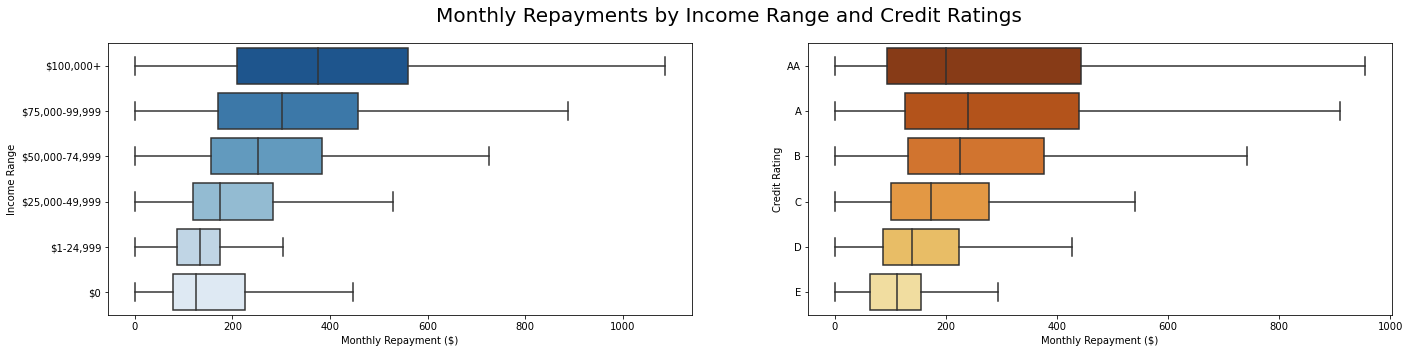

In [50]:
box_plot_repay(df);

We see a similar relationship in these plots as we did with the original loan amounts.

As mentioned previously, we may investigate this in our multivariate analysis.

For interest's sake, let's see what the distribution of the Debt to Income Ratios by Income Range and Credit Rating.

In [51]:
"""
Plot box plots of Debt to Income Ratio by Income Range and Credit Ratings.
"""

def box_plot_dti(df):
    plt.figure(figsize = [16, 5])
    
    # select 99% of the data points to plot
    perc_samples_99 = np.random.choice(df.shape[0], int(df.shape[0]*0.99), replace = False)
    df_samples_99 = df.loc[perc_samples_99,:]

    # LHS botton plot
    plt.subplot(1, 2, 1)
    sb.boxplot(data = df_samples_99, y = 'IncomeRange', x = 'DebtToIncomeRatio', palette = 'Blues_r', showfliers = False)
    plt.xlim(-0.05, 1)
    plt.ylabel('Income Range')
    plt.xlabel('Debt to Income Ratio')

    # RHS botton plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data = df_samples_99, y = 'CreditGrade', x = 'DebtToIncomeRatio', palette = 'YlOrBr_r', showfliers = False)
    plt.xlim(-0.05, 1)
    plt.ylabel('Credit Rating')
    plt.xlabel('Debt to Income Ratio')
    
    plt.suptitle('Debt to Income Ratios by Income Ranges and Credit Ratings', size = 16)
    
    return box_plot_dti

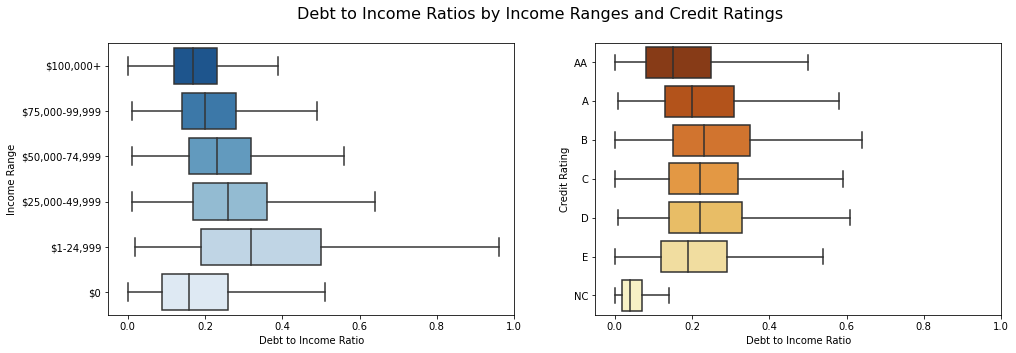

In [52]:
box_plot_dti(df);

From the above plots, we can see that as the income range increases, the debt to income ratio reduces. We observe a similar relationship with the credit rating, as it improves, the debt to income ratio decreases. Unsuprisingly, borrowers with no credit have the lowest debt to income ratio.

### Qualitative vs. Qualitative
Let's continue our exploration by observing the relationship between the income range and credit rating and the relationship between the loan status and income range.

In [53]:
""""
Plot a clustered bar chart for the Income Ranges against the Credit Grade.
"""

def clust_bar_income_v_credit(df):
    plt.figure(figsize = [10, 8])
    ax = sb.countplot(data = df, y = 'IncomeRange', hue = 'CreditGrade', palette = 'Blues_r')
    
    ax.legend(title = 'Credit Rating')
    plt.title('Distribution of Income Ranges and Credit Ratings', size = 16)
    plt.ylabel('Income Range')
    plt.xlabel('Count')
    
    return clust_bar_income_v_credit

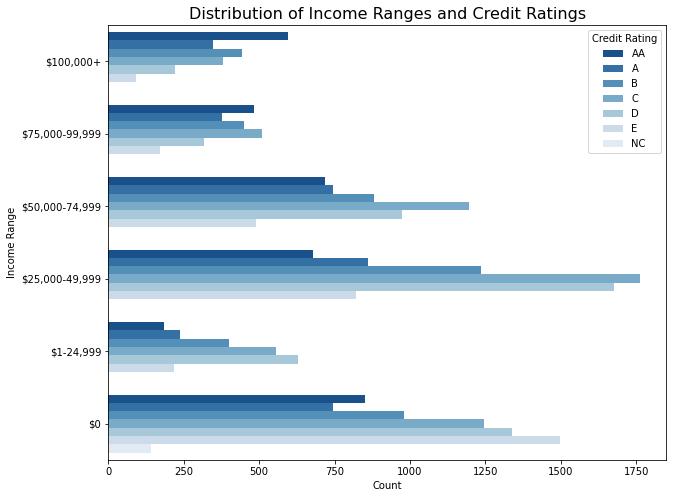

In [54]:
clust_bar_income_v_credit(df);

From this plot, we can see the trend of higher income correlates to a higher credit rating, which should allow the borrower to receive lower interest rates.

It's curious to see that there are more 'AA' credit ratings in the \\$0 range than in any other range, albeit this is the rating with the least count in this income range.

In [55]:
""""
Plot a heat map for the Income Ranges against the Loan Status.
"""
def heat_map_income_v_status(df):
    plt.figure(figsize = [16, 5])

    # step 1 - Get the data into desirable format - a DataFrame
    # use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
    status_income = df.groupby(['LoanStatus', 'IncomeRange']).size()

    # use Series.reset_index() to convert a series into a dataframe object
    status_income = status_income.reset_index(name = 'count')

    # use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
    status_income = status_income.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'count')

    # plot the heatmap
    sb.heatmap(status_income, cmap = 'viridis_r', annot = True, fmt = '.0f');
    
    plt.title('Distribution of Income Range by Loan Status', size = 16)
    plt.ylabel('Income Range (\\$)')
    plt.xlabel('Loan Status')
    return heat_map_income_v_status

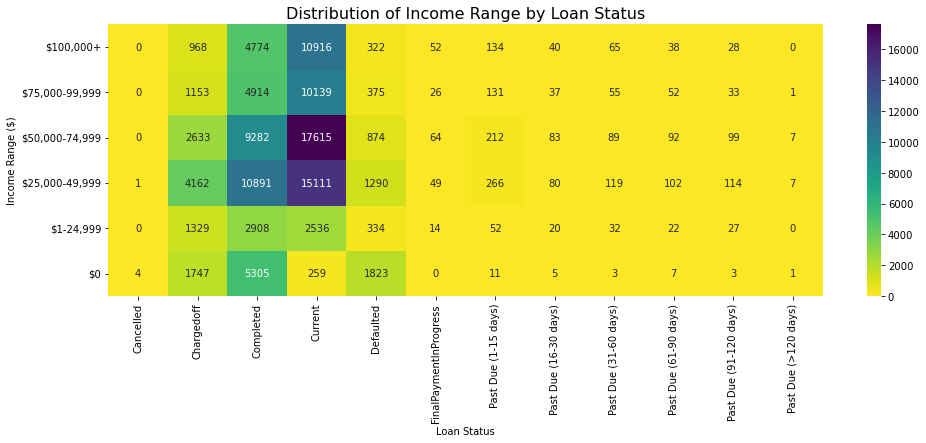

In [56]:
heat_map_income_v_status(df);

From the above plot, we can see that the highest count is in the 'Current' status within the \\$50,000-74,999 income range. Most of the loans are in the 'Current' status and we can see that there is some relation between high incomes and the 'Current' loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the matrix plots, we observed that there was some correlation between only two of the numeric variables, namely, the original loan amount and the monthly loan repayments. Upon further investigation of these two variables for the whole dataset, we saw that there are 4 distinct correlations as 4 different lines between these two variables. This could be arising from the different loan status, which we'll investigate in the multivariate analysis.

From the box plots, we saw that as the borrower's income increased, the median original loan amounts also increased. Clearly, with a higher income, the borrower has a better chance of receiving a larg initial loan amount as evidenced by the IQR for the \\$100,000+ income range. Interestingly however, we saw that as the borrower's credit rating increased, their median original loan amount also increased until we reach the 'AA' credit rating, where it suddenly decreases to below the median for the 'B' credit rating. There was an almost exact relationship between the monthly loan payments by income ranges and credit ratings.

From the clustered bar chart, we saw the trend of higher income correlating to a higher credit rating, which should allow the borrower to receive lower interest rates. It was also interesting to see that borrowers in the \\$50,000-74,999 range with a 'C' credit rating are almost as equal as the borrowers in the \\$0 range.

From the heat map, we saw that the 'Current' loan status has the highest number of loans and that a large number of those loans are from borrowers in the \\$50,000-74,999 income range, which would explain a large portion of them having a 'C' credit rating.

## Multivariate Exploration

The main thing I want to explore from bivariate analysis is the relationship between monthly loan repayments, original loan amounts and the loan status and loan term.

In [57]:
"""
Plot scatter of the original loan amount and monthly payments
by loan status and loan terms.
"""

def scatter_og_loan_repay_status_term(df):
    # create scatter plot across credit ratings and loan status
    g = sb.FacetGrid(data = df, col = 'Term', row_order = ['Completed', 'Current', 'Chargedoff', 'Defaulted'], 
                      row = 'LoanStatus', margin_titles = True, sharey = True)
    g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount', alpha = 1/8)

    g.set_axis_labels('Monthly Repayment (\\$)', 'Original Loan Amount (\\$)')

    g.fig.suptitle('Correlation of Monthly Repayments and Original Loan Amounts by Loan Status and Loan Term', size = 12)
    g.fig.subplots_adjust(top = 0.9)
    
    return scatter_og_loan_repay_status_term

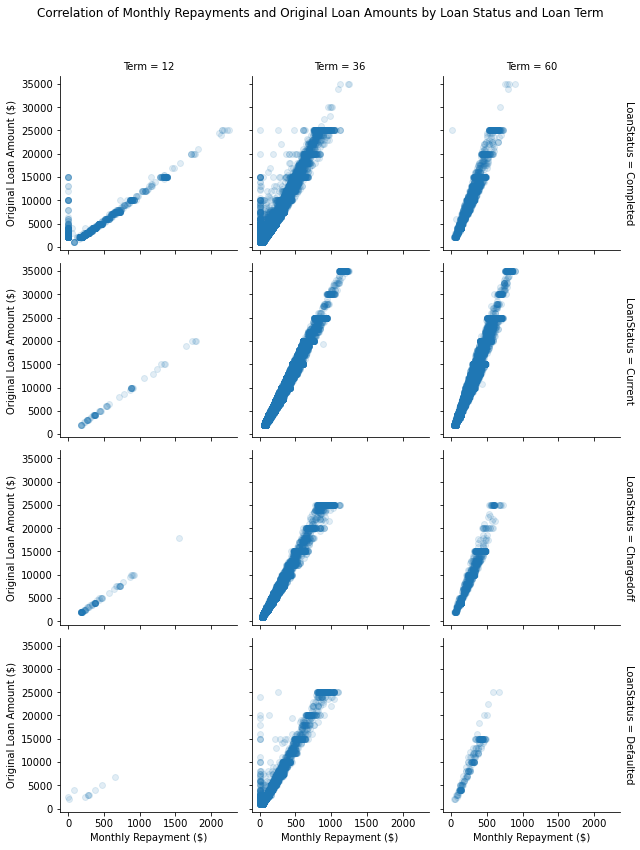

In [58]:
scatter_og_loan_repay_status_term(df);

We simplified the plot by only looking at four loan statuses: Current, Completed, Chargedoff and Defaulted. As is evidenced by the plots, there is a correlation between the original loan amounts and the monthly repayments. This correlation is clearly visible for the 'Completed' loan status and is more evident as the term of the loan increases.

### Original Loan Amount, Monthly Repayment and Interest Rate by Income Ranges and Credit Ratings

In [59]:
"""
Plot heat maps of the original loan amount and monthly payments
by income ranges and credit ratings.
"""

def loan_repay_income_credit_interest(df):
    plt.figure(figsize = [25, 15])
    
    # LHS plot - Original Loan Amount
    plt.subplot(2, 2, 1)
    cat_og_loan = df.groupby(['CreditGrade', 'IncomeRange']).median()['LoanOriginalAmount']
    cat_og_loan = cat_og_loan.reset_index(name = 'Original Loan Median Amount')
    cat_og_loan = cat_og_loan.pivot(index = 'IncomeRange', columns = 'CreditGrade', values = 'Original Loan Median Amount')

    sb.heatmap(cat_og_loan, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Original Loan Amount (\\$)'})
    plt.xlabel('Credit Rating')
    plt.ylabel('Income Range')
    
    # RHS plot - Monthly Repayments
    plt.subplot(2, 2, 2)
    cat_repay = df.groupby(['CreditGrade', 'IncomeRange']).median()['MonthlyLoanPayment']
    cat_repay = cat_repay.reset_index(name = 'Monthly Median Repayment')
    cat_repay = cat_repay.pivot(index = 'IncomeRange', columns = 'CreditGrade', values = 'Monthly Median Repayment')

    sb.heatmap(cat_repay, annot = True, fmt = '.1f', cmap = "YlOrBr", cbar_kws = {'label' : 'Monthly Median Repayment (\\$)'})
    plt.xlabel('Credit Rating')
    plt.ylabel('Income Range')
    
    # BOTTOM plot - Interest Rates
    plt.subplot(2, 2, 3)
    cat_repay = df.groupby(['CreditGrade', 'IncomeRange']).median()['BorrowerRate']*100
    cat_repay = cat_repay.reset_index(name = 'Median Interest Rate')
    cat_repay = cat_repay.pivot(index = 'IncomeRange', columns = 'CreditGrade', values = 'Median Interest Rate')

    sb.heatmap(cat_repay, annot = True, fmt = '.1f', cmap = "viridis_r", cbar_kws = {'label' : 'Median Interest Rate (%)'})
    plt.xlabel('Credit Rating')
    plt.ylabel('Income Range')

    # plot title
    t = ("Heatmap of Median Original Loan Amount, Monthly Repayment and Interest Rate "
         "by Income Range and Credit Ratings")
    plt.suptitle(t, size = 20)
    
    return loan_repay_income_credit_interest

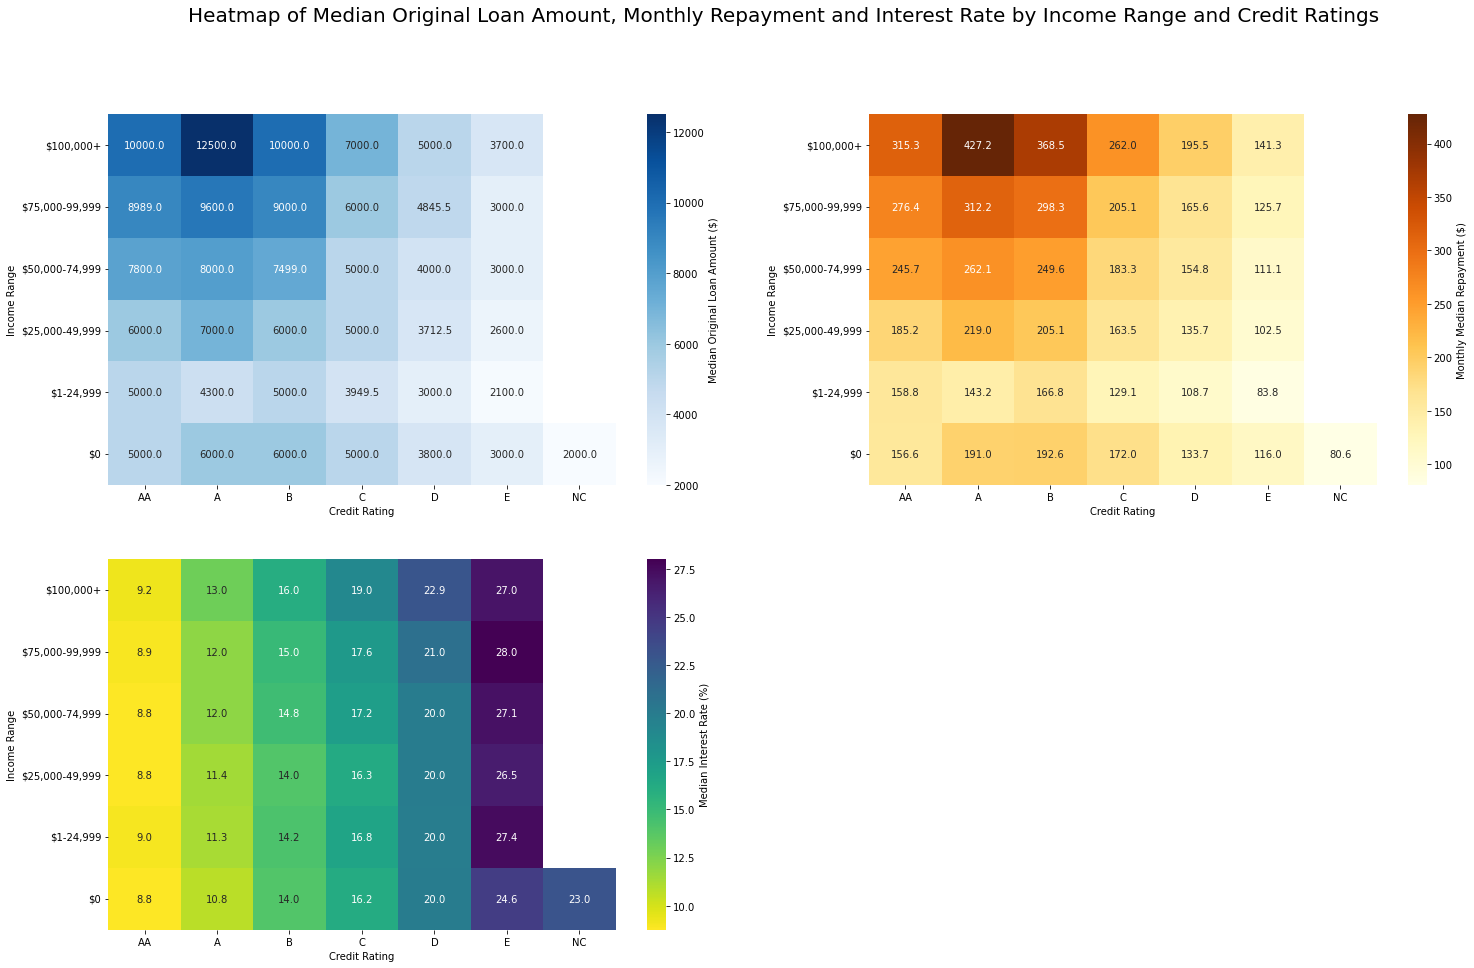

In [60]:
loan_repay_income_credit_interest(df);

From the above plots, we can see that borrowers with a high income range and high credit rating, tend to receive the highest original loan amounts and also pay the highest monthly repayments due to high interest rates.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the facet grid, we were able to show that there is a strong relationship between the monthly repayments and the original loan amount, especially for loans that are completed.

From the heat map, we were able to show that as a borrower's income range increase so to does their interest rate, although they tend to receive higher initial loan amounts. 

### Were there any interesting or surprising interactions between features?
It was interesting to note that borrower's in the \\$75,000-99,999 income range have the highest interest rate recorded of 28.0%

## Conclusions
Our variables of interest that we explored were the loan status, credit rating, loan term, interest rate, debt to income ratio, income range, original loan amount and the monthly repayment amount.

During our inivariate exploration, we saw that the 'Current' loans make up about 49.66% of the total loans and that the most common loan term is 36 months. We saw relatively normal distributions for income range, debt to income ratio, credit ratings and interest rate.

In our bivariate exploration, we observed that the monthly loan repayments vary greatly between different loan status, although there are similarities in loans tagged 'Past Due' but with less than 120 days. As a way of tidying up our visualisations, we combined several rows for different visuals where the categories appeared to be redundant. This was done specifically for the Income Range variable, where we combined 'Not employed' and 'Not displayed' and added them to '$0.'

Interestingly, we only observed some correlation between two of the numeric variables, original loan amount and the monthly repayments. When we investigated this relationship further in our multivariate exploration, we observed that there was actually a strong and positive correlation between these variables when we split them into the respective loan terms and loan statuses.

Lastly, we were able to determine that although a borrower's income may increase, this may not necessarily be favourable for them as they will ultimately pay a higher monthly repayment due to the high interest they'll receive on a loan. This may arise from the fact that a higher initial loan amount adds more to the lender as compared to a lower initial loan amount.